# Maintenance cost reduction through predictive techniques

BACKGROUND A company has a fleet of devices transmitting daily
sensor readings. They would like to create a predictive maintenance
solution to proactively identify when maintenance should be
performed. This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted. 

GOAL: You are tasked with building a predictive model using machine
learning to predict the probability of a device failure. When building
this model, be sure to minimize false positives and false negatives. The
column you are trying to Predict is called failure with binary value 0 for
non-failure and 1 for failure. 


# Data Exploration

Importing Modules

In [1]:
import pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.DataFrame()

Empty DataFrame
Columns: []
Index: []

# Load data as dataframe and data overview

In [21]:
df = pd.read_csv('predictive_maintenance_dataset.csv')

In [22]:
df.head()

date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3

In [6]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Identiyfing Number of Missing Values

In [23]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

Checking Imbalance in the Dataset

In [24]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

Checking the duplicate columns in the data set

In [25]:
df.duplicated().sum()

1

Identifying the unique number of total devices and failure devices in the dataset

In [10]:
total_devices = len(df.device.unique())
print('There are {} total devices'.format(total_devices))

total_failure_devices = len(df[df.failure == 1].device.unique())
print('There are {} total failure devices'.format(total_failure_devices))

There are 1169 total devices
There are 106 total failure devices


In [26]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

# Summary
This dataset is clean, no missing values. All attributes are integer data type.

It is imbalanced data set, as the failuer class is about 0.1% of unfailure class.Here oversampling approach is used to deal with imbalanced dataset.

metric 7 and 8 seems like exactly same to each other, we can drop one of them.

Some attributes have limited number of distictive values, very sparse, indicating that they are likely to be categorical variable, such as metric3, 5,7,9.


metric 2,3,4,7,9 are highly skewed.

metric differ in their magnitudes. Scaling or centering is requried

# Data Engineering

'Date' Exploration

Creating features based on date

Splitting the date column in Month and Weekdays

Also, Calculating the active days of all the devices considering 2015-01-01 as the minimum or starting date

In [27]:
df.date = pd.to_datetime(df.date)

df['activedays']=df.date-df.date[0]

df['month']=df['date'].dt.month
df['week_day']=df.date.dt.weekday
df['week_day'].replace(0,7,inplace=True)
df

date    device  failure    metric1  metric2  metric3  metric4  \
0      2015-01-01  S1F01085        0  215630672       55        0       52   
1      2015-01-01  S1F0166B        0   61370680        0        3        0   
2      2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3      2015-01-01  S1F01JE0        0   79694024        0        0        0   
4      2015-01-01  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489 2015-11-02  Z1F0MA1S        0   18310224        0        0        0   
124490 2015-11-02  Z1F0Q8RT        0  172556680       96      107        4   
124491 2015-11-02  Z1F0QK05        0   19029120     4832        0        0   
124492 2015-11-02  Z1F0QL3N        0  226953408        0        0        0   
124493 2015-11-02  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9 activedays  month  \
0             6   407438        0        0        7     0 days      1   
1             6   403174        0        0        0     0 days      1   
2            12   237394        0        0        0     0 days      1   
3             6   410186        0        0        0     0 days      1   
4            15   313173        0        0        3     0 days      1   
...         ...      ...      ...      ...      ...        ...    ...   
124489       10   353705        8        8        0   305 days     11   
124490       11   332792        0        0       13   305 days     11   
124491       11   350410        0        0        0   305 days     11   
124492       12   358980        0        0        0   305 days     11   
124493       10   351431        0        0    70000   305 days     11   

        week_day  
0              3  
1              3  
2              3  
3              3  
4              3  
...          ...  
124489         7  
124490         7  
124491         7  
124492         7  
124493         7  

[124494 rows x 15 columns]

Grouping the unique device numbers in Months

In [28]:
df.groupby('month').agg({'device':lambda x: x.nunique()})

device
month        
1        1164
2         726
3         685
4         491
5         424
6         353
7         346
8         334
9         184
10        146
11         31

# Data visualization in date

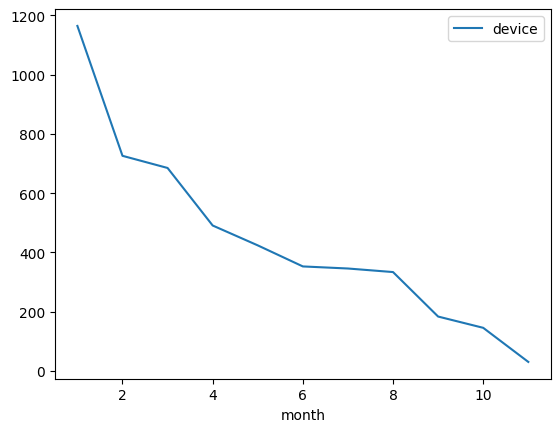

In [29]:
df.groupby('month').agg({'device':lambda x: x.nunique()}).plot()
plt.show()


This figure shows that as time move on, the number of devices are getting less and less.

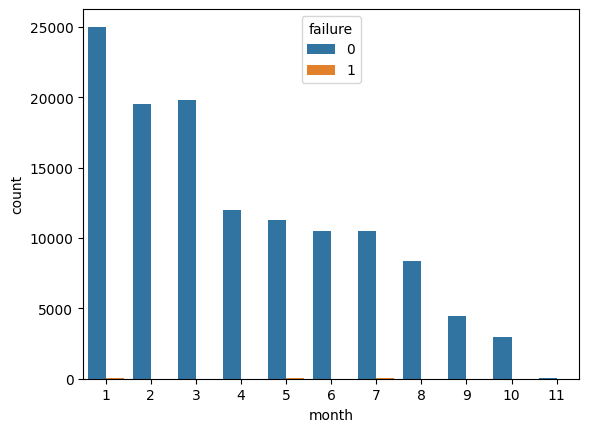

In [56]:

ax = sns.countplot(x="month", hue="failure", data=df)
plt.show()

This figure shows most of the devices failed in the first month.

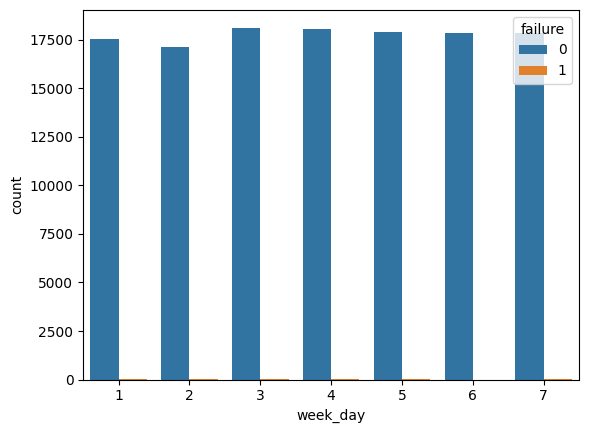

In [16]:
ax = sns.countplot(x='week_day',hue='failure',data=df)
plt.show()

This figure shows that there is no device fails on Saturday. Maybe they don't work on the this day.

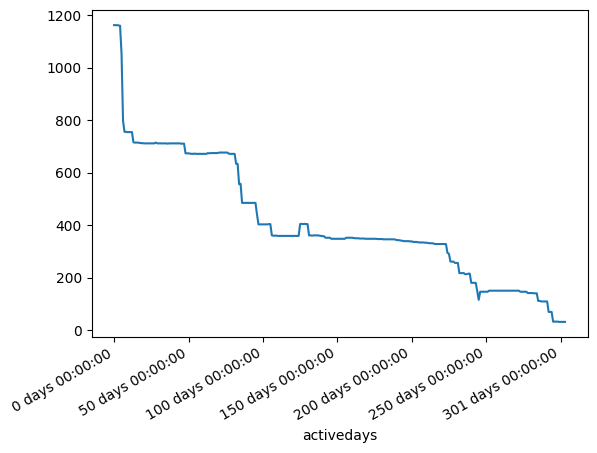

In [31]:
df.groupby('activedays')['device'].count().plot()
plt.show()

One can see that the number of devices decreases as time goes by. And there is a big jump in the middle of activedays. Those may be some devices got put back in after they failed and fixed well. We will investigate the detail later.

In [32]:
max(df.date), min(df.date)

(Timestamp('2015-11-02 00:00:00'), Timestamp('2015-01-01 00:00:00'))

All of these data are collected between 11/02/2015 and 01/01/2015

# Devices come back to use

In [59]:
df_date = df.groupby('device').agg({'date':max})

df_date.date.to_dict()

df_failure = df.loc[df.failure==1,['device','date']]

df_good = df.loc[df.failure==0,['device','date']]

df_date.shape,df_failure.shape

df['max_date']=df.device.map(df_date.date.to_dict())

df



date    device  failure    metric1  metric2  metric3  metric4  \
0      2015-01-01  S1F01085        0  215630672       55        0       52   
1      2015-01-01  S1F0166B        0   61370680        0        3        0   
2      2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3      2015-01-01  S1F01JE0        0   79694024        0        0        0   
4      2015-01-01  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489 2015-11-02  Z1F0MA1S        0   18310224        0        0        0   
124490 2015-11-02  Z1F0Q8RT        0  172556680       96      107        4   
124491 2015-11-02  Z1F0QK05        0   19029120     4832        0        0   
124492 2015-11-02  Z1F0QL3N        0  226953408        0        0        0   
124493 2015-11-02  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9 activedays  month  \
0             6   407438        0        0        7     0 days      1   
1             6   403174        0        0        0     0 days      1   
2            12   237394        0        0        0     0 days      1   
3             6   410186        0        0        0     0 days      1   
4            15   313173        0        0        3     0 days      1   
...         ...      ...      ...      ...      ...        ...    ...   
124489       10   353705        8        8        0   305 days     11   
124490       11   332792        0        0       13   305 days     11   
124491       11   350410        0        0        0   305 days     11   
124492       12   358980        0        0        0   305 days     11   
124493       10   351431        0        0    70000   305 days     11   

        week_day   max_date  
0              3 2015-01-06  
1              3 2015-01-06  
2              3 2015-02-17  
3              3 2015-01-06  
4              3 2015-08-24  
...          ...        ...  
124489         7 2015-11-02  
124490         7 2015-11-02  
124491         7 2015-11-02  
124492         7 2015-11-02  
124493         7 2015-11-02  

[124494 rows x 16 columns]

In [60]:
dff=df[(df.failure==1)&(df.date!=df.max_date)]

dff

date    device  failure    metric1  metric2  metric3  metric4  \
77958  2015-05-05  S1F136J0        1  131519808        0        0       25   
79590  2015-05-09  W1F0KCP2        1  176861128    10392        0      121   
79601  2015-05-09  W1F0M35B        1  141805096        0        0        1   
101999 2015-07-12  S1F0GPFZ        1  236544080        0        0        0   
104223 2015-07-18  W1F11ZG9        1   32671632      368        9      486   

        metric5  metric6  metric7  metric8  metric9 activedays  month  \
77958        16   343464        8        8        0   124 days      5   
79590         6   310699        0        0        0   128 days      5   
79601         7   267203        0        0        0   128 days      5   
101999        9   264594        0        0        0   192 days      7   
104223        3   344433        0        0        1   198 days      7   

        week_day   max_date  
77958          1 2015-05-06  
79590          5 2015-05-11  
79601          5 2015-05-11  
101999         6 2015-07-24  
104223         5 2015-08-17

Max date means the last day the device got checked. If the max day is ahead of failure date, it means this device returned to use after failed because got fixed.

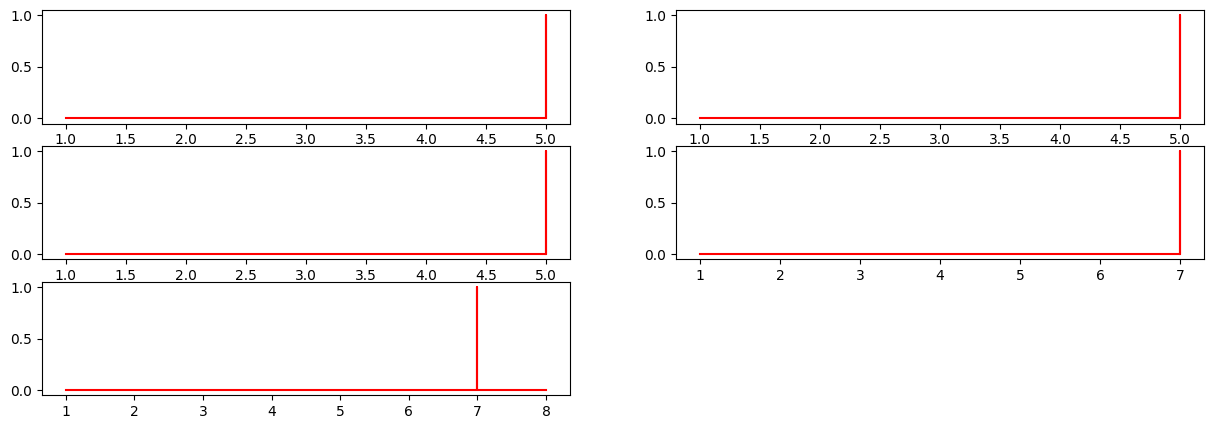

In [34]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(3, 2, 1) 
plt.plot(df.loc[df['device']=='S1F136J0',['failure','month']]['month'],df.loc[df['device']=='S1F136J0',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 2) 
plt.plot(df.loc[df['device']=='W1F0KCP2',['failure','month']]['month'],df.loc[df['device']=='W1F0KCP2',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 3)
plt.plot(df.loc[df['device']=='W1F0M35B',['failure','month']]['month'],df.loc[df['device']=='W1F0M35B',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 4)
plt.plot(df.loc[df['device']=='S1F0GPFZ',['failure','month']]['month'],df.loc[df['device']=='S1F0GPFZ',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 5)
plt.plot(df.loc[df['device']=='W1F11ZG9',['failure','month']]['month'],df.loc[df['device']=='W1F11ZG9',\
         ['failure','month']]['failure'],\
         color = 'red')

plt.show()

# Reduce dataset with Unique Device ID

In [55]:
df.head()

date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       55        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric8  metric9 activedays  month  week_day  \
0        6   407438        0        0        7     0 days      1         3   
1        6   403174        0        0        0     0 days      1         3   
2       12   237394        0        0        0     0 days      1         3   
3        6   410186        0        0        0     0 days      1         3   
4       15   313173        0        0        3     0 days      1         3   

    max_date  
0 2015-01-06  
1 2015-01-06  
2 2015-02-17  
3 2015-01-06  
4 2015-08-24

In [36]:
df.metric1.nunique()

123877

In [37]:
df1 = df.groupby('device').agg({'date':max})

In [40]:
df1.shape

(1169, 1)

In [42]:
df1

date
device             
S1F01085 2015-01-06
S1F013BB 2015-05-11
S1F0166B 2015-01-06
S1F01E6Y 2015-02-17
S1F01JE0 2015-01-06
...             ...
Z1F1VMZB 2015-10-19
Z1F1VQFY 2015-06-30
Z1F26YZB 2015-03-25
Z1F282ZV 2015-03-25
Z1F2PBHX 2015-04-06

[1169 rows x 1 columns]

In [43]:
df1=df1.reset_index()

df=df.reset_index(drop=True) 

df2= pd.merge(df1,df,how='left',on=['device','date'])

df2.shape

(1169, 16)

In [44]:
df2

device       date  failure    metric1  metric2  metric3  metric4  \
0     S1F01085 2015-01-06        0  128832128       56        0       52   
1     S1F013BB 2015-05-11        0  115676688        0        0        0   
2     S1F0166B 2015-01-06        0    7441792        0        3        0   
3     S1F01E6Y 2015-02-17        0  147350000        0        0        0   
4     S1F01JE0 2015-01-06        0  185424928        0        0        0   
...        ...        ...      ...        ...      ...      ...      ...   
1164  Z1F1VMZB 2015-10-19        0   96949360        0        0        0   
1165  Z1F1VQFY 2015-06-30        1  178051496        0        0        0   
1166  Z1F26YZB 2015-03-25        0  229065488        0        1        0   
1167  Z1F282ZV 2015-03-25        0   72717600        0        1        0   
1168  Z1F2PBHX 2015-04-06        0  130522432        0        0        0   

      metric5  metric6  metric7  metric8  metric9 activedays  month  week_day  \
0           6   409404        0        0        7     5 days      1         1   
1           5   689161        0        0        0   130 days      5         7   
2           6   404786        0        0        0     5 days      1         1   
3          12   259491        0        0        0    47 days      2         1   
4           6   412151        0        0        0     5 days      1         1   
...       ...      ...      ...      ...      ...        ...    ...       ...   
1164        5   263507        0        0        0   291 days     10         7   
1165        7   265316        0        0        0   180 days      6         1   
1166        1   292052        0        0        0    83 days      3         2   
1167        1   192919        0        0        0    83 days      3         2   
1168        5   164020        0        0        0    95 days      4         7   

       max_date  
0    2015-01-06  
1    2015-05-11  
2    2015-01-06  
3    2015-02-17  
4    2015-01-06  
...         ...  
1164 2015-10-19  
1165 2015-06-30  
1166 2015-03-25  
1167 2015-03-25  
1168 2015-04-06  

[1169 rows x 16 columns]

# Create feature called 'failure_before'

If we just take the last record for the devices, we may lose information from those come back after failed ones

In [45]:
df2['failure_before']=0

In [46]:
df2.head()

device       date  failure    metric1  metric2  metric3  metric4  \
0  S1F01085 2015-01-06        0  128832128       56        0       52   
1  S1F013BB 2015-05-11        0  115676688        0        0        0   
2  S1F0166B 2015-01-06        0    7441792        0        3        0   
3  S1F01E6Y 2015-02-17        0  147350000        0        0        0   
4  S1F01JE0 2015-01-06        0  185424928        0        0        0   

   metric5  metric6  metric7  metric8  metric9 activedays  month  week_day  \
0        6   409404        0        0        7     5 days      1         1   
1        5   689161        0        0        0   130 days      5         7   
2        6   404786        0        0        0     5 days      1         1   
3       12   259491        0        0        0    47 days      2         1   
4        6   412151        0        0        0     5 days      1         1   

    max_date  failure_before  
0 2015-01-06               0  
1 2015-05-11               0  
2 2015-01-06               0  
3 2015-02-17               0  
4 2015-01-06               0

In [47]:
df2.loc[df2.device == 'S1F136J0','failure_before'] = 1
df2.loc[df2.device == 'W1F0KCP2','failure_before'] = 1
df2.loc[df2.device == 'W1F0M35B','failure_before'] = 1
df2.loc[df2.device == 'S1F0GPFZ','failure_before'] = 1
df2.loc[df2.device == 'W1F11ZG9','failure_before'] = 1

# Redefine device ID Value

In [48]:
df2.device

0       S1F01085
1       S1F013BB
2       S1F0166B
3       S1F01E6Y
4       S1F01JE0
          ...   
1164    Z1F1VMZB
1165    Z1F1VQFY
1166    Z1F26YZB
1167    Z1F282ZV
1168    Z1F2PBHX
Name: device, Length: 1169, dtype: object

In [49]:
Id = df2.device.values.tolist()

Changing device ID for first four characters

In [62]:
Id1 = [] 
for i in Id:
    i = i[:4]
    Id1.append(i)

df2.device=Id1

df2.device.value_counts()

S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: device, dtype: int64

In [63]:
dev=pd.crosstab(df2['device'],df2['failure']) 

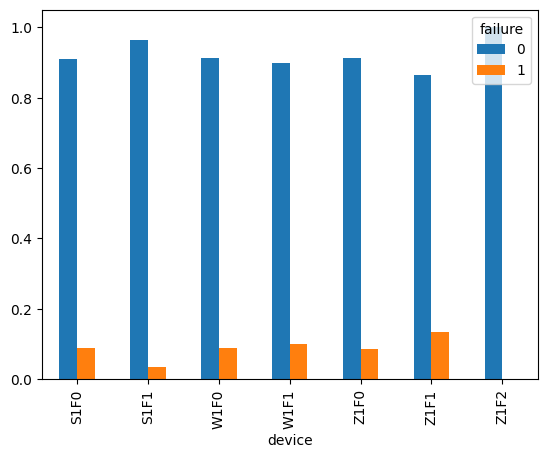

In [67]:
dev.div(dev.sum(1).astype(float), axis=0).plot(kind="bar")
plt.show()

From the Barplot we can say that Devices ID which begins with ZIF1 fails the most, then W1F1 second

# Data Transformation

In [70]:
df2

device       date  failure    metric1  metric2  metric3  metric4  \
0      S1F0 2015-01-06        0  128832128       56        0       52   
1      S1F0 2015-05-11        0  115676688        0        0        0   
2      S1F0 2015-01-06        0    7441792        0        3        0   
3      S1F0 2015-02-17        0  147350000        0        0        0   
4      S1F0 2015-01-06        0  185424928        0        0        0   
...     ...        ...      ...        ...      ...      ...      ...   
1164   Z1F1 2015-10-19        0   96949360        0        0        0   
1165   Z1F1 2015-06-30        1  178051496        0        0        0   
1166   Z1F2 2015-03-25        0  229065488        0        1        0   
1167   Z1F2 2015-03-25        0   72717600        0        1        0   
1168   Z1F2 2015-04-06        0  130522432        0        0        0   

      metric5  metric6  metric7  metric8  metric9 activedays  month  week_day  \
0           6   409404        0        0        7     5 days      1         1   
1           5   689161        0        0        0   130 days      5         7   
2           6   404786        0        0        0     5 days      1         1   
3          12   259491        0        0        0    47 days      2         1   
4           6   412151        0        0        0     5 days      1         1   
...       ...      ...      ...      ...      ...        ...    ...       ...   
1164        5   263507        0        0        0   291 days     10         7   
1165        7   265316        0        0        0   180 days      6         1   
1166        1   292052        0        0        0    83 days      3         2   
1167        1   192919        0        0        0    83 days      3         2   
1168        5   164020        0        0        0    95 days      4         7   

       max_date  failure_before  
0    2015-01-06               0  
1    2015-05-11               0  
2    2015-01-06               0  
3    2015-02-17               0  
4    2015-01-06               0  
...         ...             ...  
1164 2015-10-19               0  
1165 2015-06-30               0  
1166 2015-03-25               0  
1167 2015-03-25               0  
1168 2015-04-06               0  

[1169 rows x 17 columns]

In [71]:
df2.nunique()

device               7
date               104
failure              2
metric1           1168
metric2            118
metric3             44
metric4             67
metric5             58
metric6           1135
metric7             22
metric8             22
metric9             64
activedays         104
month               11
week_day             7
max_date           104
failure_before       2
dtype: int64

As metric 3, 4, 5, 7, 9 are very small we shall convert this as a categorical data

In [72]:
cat_ftrs = ['metric3','metric4', 'metric5', 'metric7', 'metric9'] 
for col in cat_ftrs:
    df2[col]=df2[col].astype('object')

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   int64         
 14  week_day        1169 non-null   int64         
 15  max_

Now, Converting the activedays datatype to numerical datatype

In [80]:
def str_to_num(str):
    return str.split(' ')[0]

df2.activedays = df2.activedays.astype('str')

df2.activedays=df2.activedays.apply(str_to_num)
df2.activedays = df2.activedays.astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   int64         
 14  week_day        1169 non-null   int64         
 15  max_

Also, Converting month and week_days in categorical data

In [81]:
for col in ['month','week_day']:
    df2[col]=df2[col].astype('object')

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

# Data Standardization

In [91]:
df2.head()

device       date  failure    metric1  metric2 metric3 metric4 metric5  \
0   S1F0 2015-01-06        0  128832128       56       0      52       6   
1   S1F0 2015-05-11        0  115676688        0       0       0       5   
2   S1F0 2015-01-06        0    7441792        0       3       0       6   
3   S1F0 2015-02-17        0  147350000        0       0       0      12   
4   S1F0 2015-01-06        0  185424928        0       0       0       6   

   metric6 metric7  metric8 metric9  activedays month week_day   max_date  \
0   409404       0        0       7           5     1        1 2015-01-06   
1   689161       0        0       0         130     5        7 2015-05-11   
2   404786       0        0       0           5     1        1 2015-01-06   
3   259491       0        0       0          47     2        1 2015-02-17   
4   412151       0        0       0           5     1        1 2015-01-06   

   failure_before  
0               0  
1               0  
2               0  
3               0  
4               0

Data Normalization

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


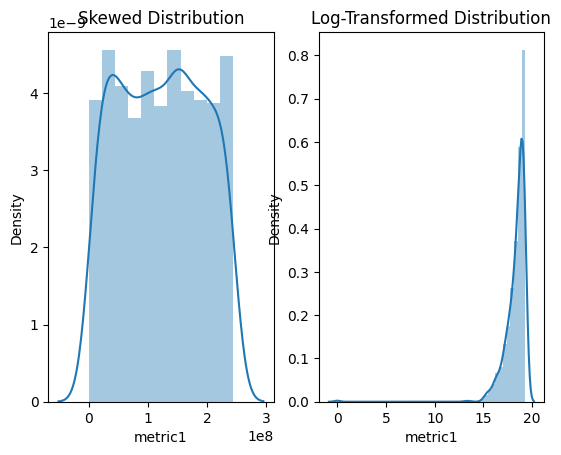

In [90]:
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['metric1'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['metric1']),ax=axarr[1]) 
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


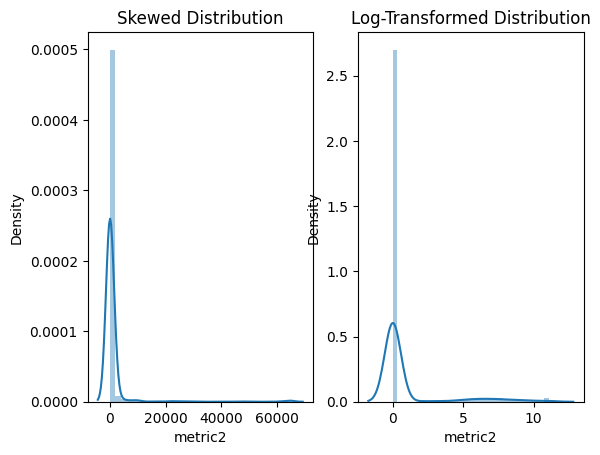

In [104]:
f, axarr = plt.subplots(1,2) 

sns.distplot(df2['metric2'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['metric2']),ax=axarr[1]) 
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


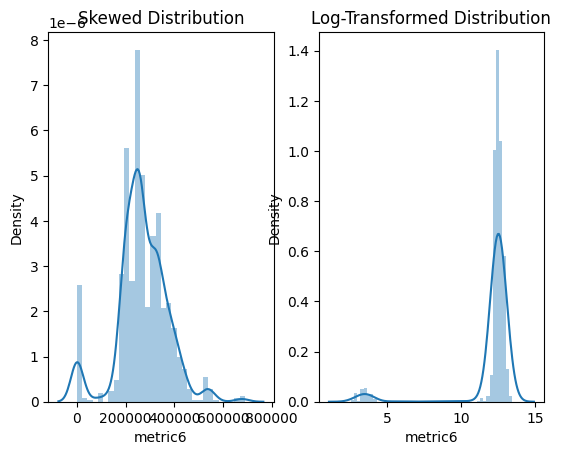

In [123]:
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['metric6'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['metric6']),ax=axarr[1]) 
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

Data Standardization

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_ftrs =['metric1','metric2','metric6'] 
df2[num_ftrs]=scaler.fit_transform(df2[num_ftrs])

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   float64       
 4   metric2         1169 non-null   float64       
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   float64       
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


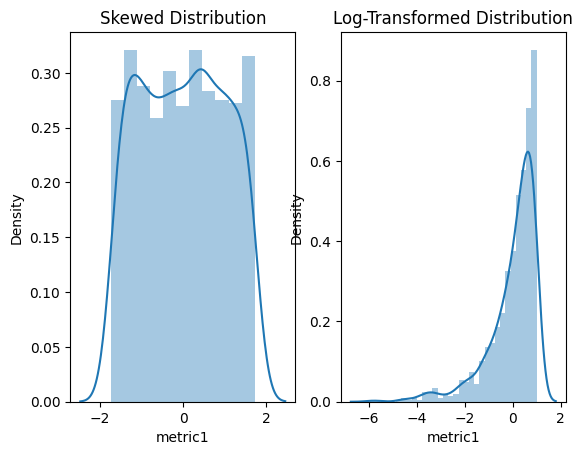

In [126]:
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['metric1'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['metric1']),ax=axarr[1]) 
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

Here, we see that metric1, metric2 and metric6 are scaled.

# Drop Unimportant and Redundant Features

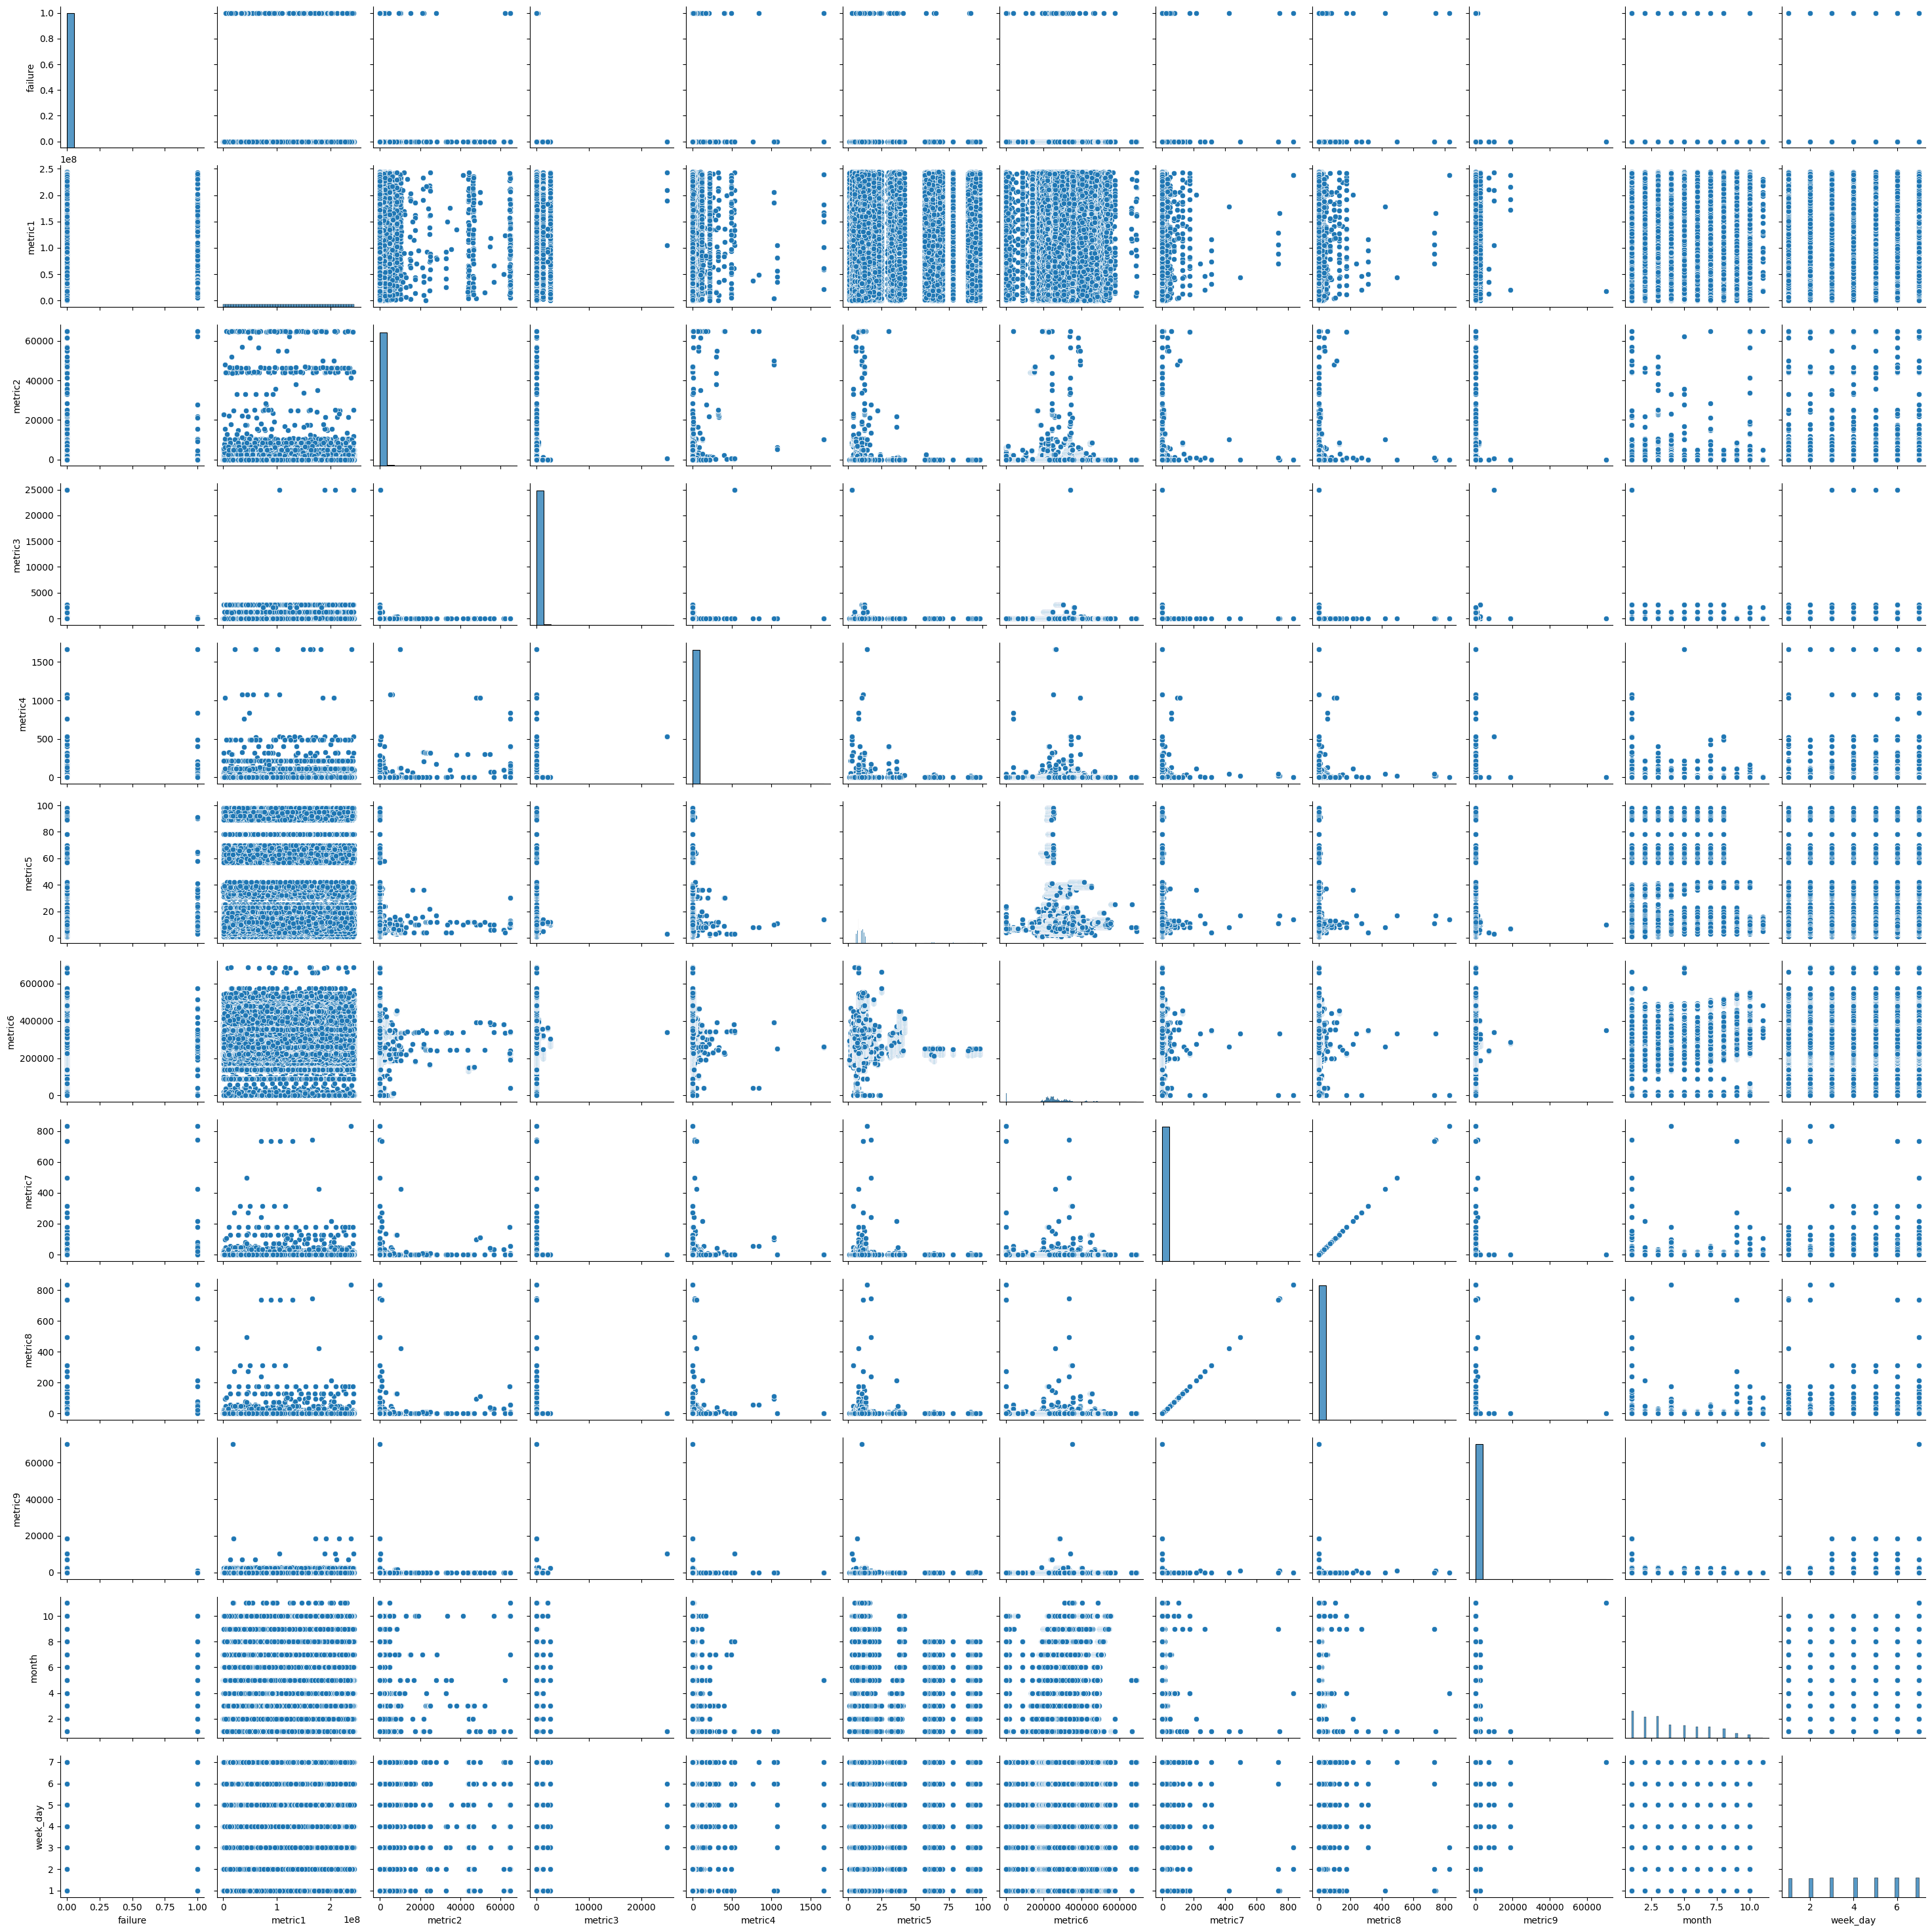

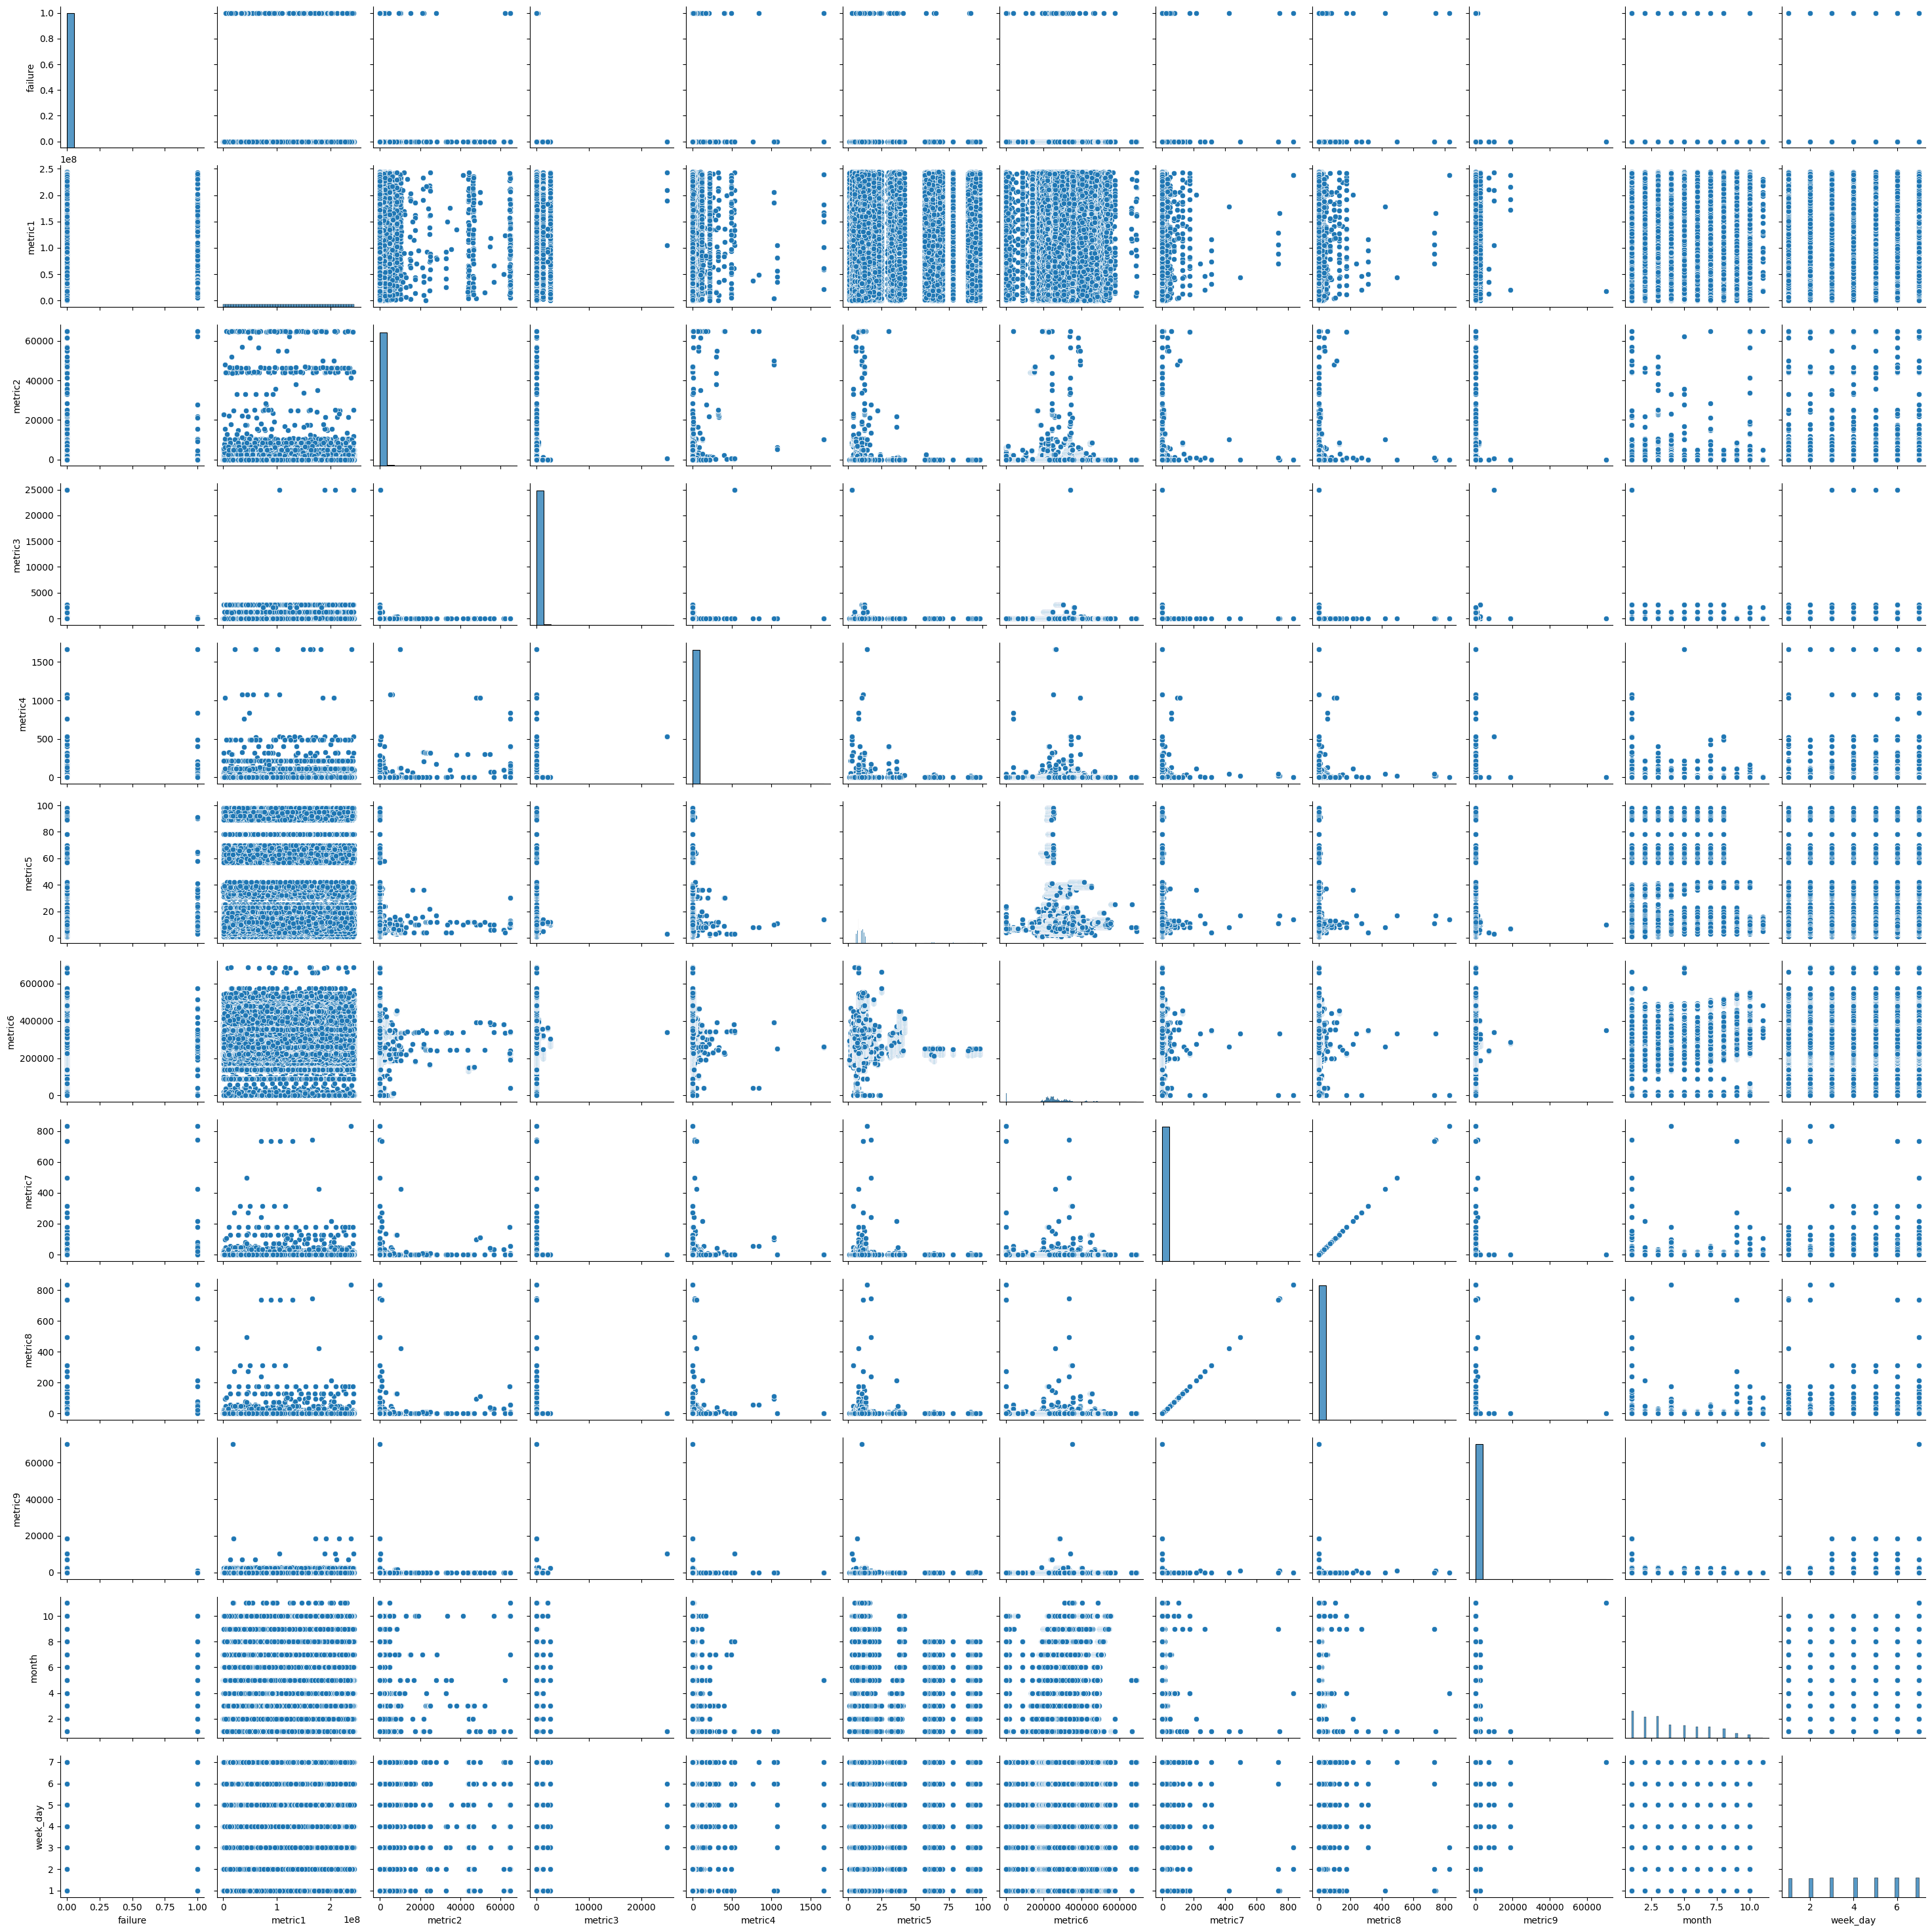

In [128]:
sns.pairplot(df)
plt.show()

It is obvious that metric7 and metric8 is highly linear related or equal to each other

In [130]:
(df['metric7']==df['metric8']).value_counts()

True    124494
dtype: int64

Thus, dropping metric8 column from the dataset

In [131]:
df.drop('metric8',axis=1,inplace=True)

In [132]:
df.head()

date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       55        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric9 activedays  month  week_day   max_date  
0        6   407438        0        7     0 days      1         3 2015-01-06  
1        6   403174        0        0     0 days      1         3 2015-01-06  
2       12   237394        0        0     0 days      1         3 2015-02-17  
3        6   410186        0        0     0 days      1         3 2015-01-06  
4       15   313173        0        3     0 days      1         3 2015-08-24

In [133]:
df2.head()

device       date  failure   metric1   metric2 metric3 metric4 metric5  \
0   S1F0 2015-01-06        0  0.094795 -0.136309       0      52       6   
1   S1F0 2015-05-11        0 -0.092146 -0.145660       0       0       5   
2   S1F0 2015-01-06        0 -1.630184 -0.145660       3       0       6   
3   S1F0 2015-02-17        0  0.357937 -0.145660       0       0      12   
4   S1F0 2015-01-06        0  0.898989 -0.145660       0       0       6   

    metric6 metric7  metric8 metric9  activedays month week_day   max_date  \
0  1.333502       0        0       7           5     1        1 2015-01-06   
1  4.008798       0        0       0         130     5        7 2015-05-11   
2  1.289341       0        0       0           5     1        1 2015-01-06   
3 -0.100105       0        0       0          47     2        1 2015-02-17   
4  1.359772       0        0       0           5     1        1 2015-01-06   

   failure_before  
0               0  
1               0  
2               0  
3               0  
4               0

In [134]:
df2.drop(['date','max_date'],axis=1,inplace=True)

In [135]:
df2.head()

device  failure   metric1   metric2 metric3 metric4 metric5   metric6  \
0   S1F0        0  0.094795 -0.136309       0      52       6  1.333502   
1   S1F0        0 -0.092146 -0.145660       0       0       5  4.008798   
2   S1F0        0 -1.630184 -0.145660       3       0       6  1.289341   
3   S1F0        0  0.357937 -0.145660       0       0      12 -0.100105   
4   S1F0        0  0.898989 -0.145660       0       0       6  1.359772   

  metric7  metric8 metric9  activedays month week_day  failure_before  
0       0        0       7           5     1        1               0  
1       0        0       0         130     5        7               0  
2       0        0       0           5     1        1               0  
3       0        0       0          47     2        1               0  
4       0        0       0           5     1        1               0

In [136]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   device          1169 non-null   object 
 1   failure         1169 non-null   int64  
 2   metric1         1169 non-null   float64
 3   metric2         1169 non-null   float64
 4   metric3         1169 non-null   object 
 5   metric4         1169 non-null   object 
 6   metric5         1169 non-null   object 
 7   metric6         1169 non-null   float64
 8   metric7         1169 non-null   object 
 9   metric8         1169 non-null   int64  
 10  metric9         1169 non-null   object 
 11  activedays      1169 non-null   int32  
 12  month           1169 non-null   object 
 13  week_day        1169 non-null   object 
 14  failure_before  1169 non-null   int64  
dtypes: float64(3), int32(1), int64(3), object(8)
memory usage: 141.6+ KB


Now, creating dummies of categorical datatype

In [137]:
df2 = pd.get_dummies(df2,drop_first=True)

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [138]:
df2.head()

failure   metric1   metric2   metric6  metric8  activedays  failure_before  \
0        0  0.094795 -0.136309  1.333502        0           5               0   
1        0 -0.092146 -0.145660  4.008798        0         130               0   
2        0 -1.630184 -0.145660  1.289341        0           5               0   
3        0  0.357937 -0.145660 -0.100105        0          47               0   
4        0  0.898989 -0.145660  1.359772        0           5               0   

   device_S1F1  device_W1F0  device_W1F1  ...  month_8  month_9  month_10  \
0            0            0            0  ...        0        0         0   
1            0            0            0  ...        0        0         0   
2            0            0            0  ...        0        0         0   
3            0            0            0  ...        0        0         0   
4            0            0            0  ...        0        0         0   

   month_11  week_day_2  week_day_3  week_day_4  week_day_5  week_day_6  \
0         0           0           0           0           0           0   
1         0           0           0           0           0           0   
2         0           0           0           0           0           0   
3         0           0           0           0           0           0   
4         0           0           0           0           0           0   

   week_day_7  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 279 columns]

In [142]:
df2.shape

(1169, 279)

In [143]:
df2.failure.value_counts()

0    1068
1     101
Name: failure, dtype: int64

# Feature Selection

# Defining dependent and independent values

In [144]:
X = df2.drop('failure',axis=1)
Y = df2.failure

In [146]:
X

metric1   metric2   metric6  metric8  activedays  failure_before  \
0     0.094795 -0.136309  1.333502        0           5               0   
1    -0.092146 -0.145660  4.008798        0         130               0   
2    -1.630184 -0.145660  1.289341        0           5               0   
3     0.357937 -0.145660 -0.100105        0          47               0   
4     0.898989 -0.145660  1.359772        0           5               0   
...        ...       ...       ...      ...         ...             ...   
1164 -0.358265 -0.145660 -0.061700        0         291               0   
1165  0.794211 -0.145660 -0.044401        0         180               0   
1166  1.519129 -0.145660  0.211274        0          83               0   
1167 -0.702603 -0.145660 -0.736728        0          83               0   
1168  0.118815 -0.145660 -1.013087        0          95               0   

      device_S1F1  device_W1F0  device_W1F1  device_Z1F0  ...  month_8  \
0               0            0            0            0  ...        0   
1               0            0            0            0  ...        0   
2               0            0            0            0  ...        0   
3               0            0            0            0  ...        0   
4               0            0            0            0  ...        0   
...           ...          ...          ...          ...  ...      ...   
1164            0            0            0            0  ...        0   
1165            0            0            0            0  ...        0   
1166            0            0            0            0  ...        0   
1167            0            0            0            0  ...        0   
1168            0            0            0            0  ...        0   

      month_9  month_10  month_11  week_day_2  week_day_3  week_day_4  \
0           0         0         0           0           0           0   
1           0         0         0           0           0           0   
2           0         0         0           0           0           0   
3           0         0         0           0           0           0   
4           0         0         0           0           0           0   
...       ...       ...       ...         ...         ...         ...   
1164        0         1         0           0           0           0   
1165        0         0         0           0           0           0   
1166        0         0         0           1           0           0   
1167        0         0         0           1           0           0   
1168        0         0         0           0           0           0   

      week_day_5  week_day_6  week_day_7  
0              0           0           0  
1              0           0           1  
2              0           0           0  
3              0           0           0  
4              0           0           0  
...          ...         ...         ...  
1164           0           0           1  
1165           0           0           0  
1166           0           0           0  
1167           0           0           0  
1168           0           0           1  

[1169 rows x 278 columns]

In [148]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1164    0
1165    1
1166    0
1167    0
1168    0
Name: failure, Length: 1169, dtype: int64

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


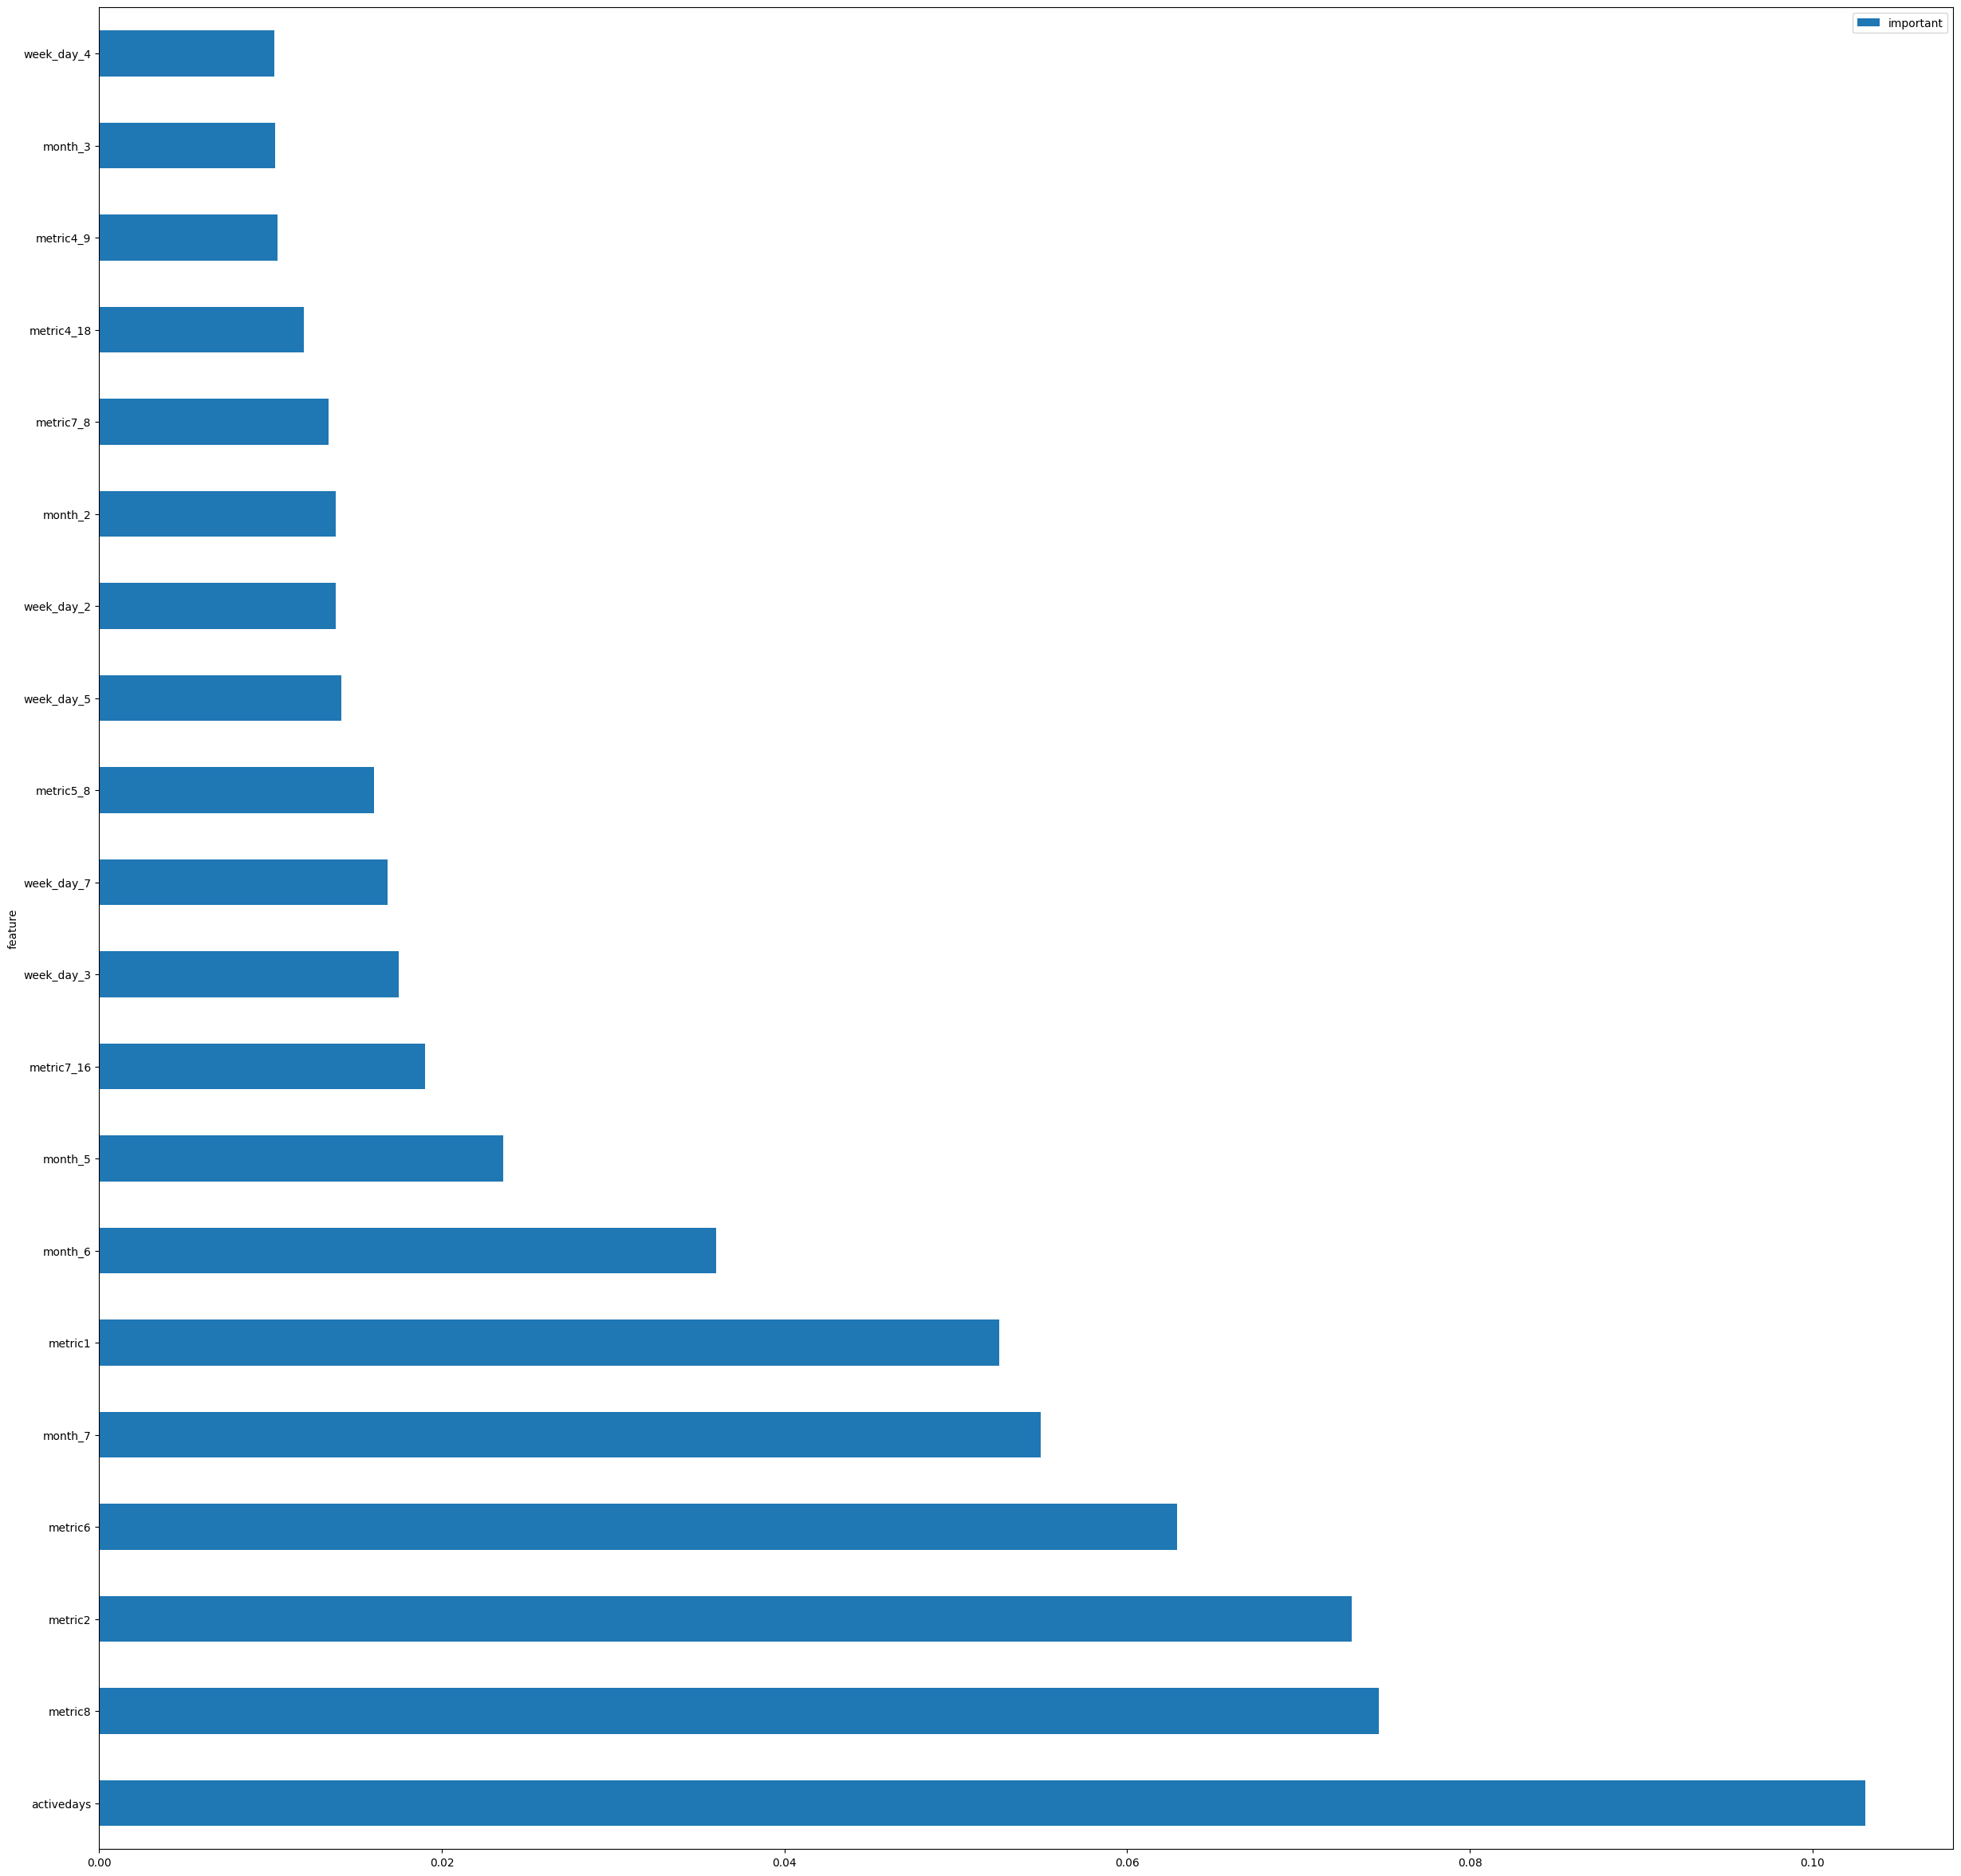

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='auto')
clf= clf.fit(X,Y)

features = pd.DataFrame()
features['feature']= X.columns
features['important']=clf.feature_importances_
features.sort_values(by=['important'], ascending=False,inplace=True)
features.set_index('feature', inplace=True)
features.iloc[:20,:].plot(kind='barh', figsize=(30,30))

plt.show()

In [155]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf,prefit=True)
x_reduced = model.transform(X)
print (x_reduced.shape)

(1169, 55)


c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [156]:
x_reduced=pd.DataFrame(x_reduced)

In [157]:
x_reduced.head()

0         1         2    3      4    5    6    7    8    9   ...  \
0  0.094795 -0.136309  1.333502  0.0    5.0  0.0  0.0  0.0  0.0  0.0  ...   
1 -0.092146 -0.145660  4.008798  0.0  130.0  0.0  0.0  0.0  0.0  0.0  ...   
2 -1.630184 -0.145660  1.289341  0.0    5.0  0.0  0.0  0.0  0.0  0.0  ...   
3  0.357937 -0.145660 -0.100105  0.0   47.0  0.0  0.0  0.0  0.0  0.0  ...   
4  0.898989 -0.145660  1.359772  0.0    5.0  0.0  0.0  0.0  0.0  0.0  ...   

    45   46   47   48   49   50   51   52   53   54  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 55 columns]

# Model Training

# Logistic Regression Model (LoR)

In [175]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()


Splitting the dataset into train and test

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)


Fitting the LoR model in our data

In [162]:
log.fit(X_train, Y_train)

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicting the test dataset values from the trained dataset 

In [163]:
predictions = log.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy_score(Y_test, predictions)

0.9259259259259259

 We see that Logistic Regression gives us an efficiency of about 92% 

In [167]:
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       321
           1       0.75      0.20      0.32        30

    accuracy                           0.93       351
   macro avg       0.84      0.60      0.64       351
weighted avg       0.91      0.93      0.91       351

[[319   2]
 [ 24   6]]


Applying Hyperparameter on our LoR model

In [169]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='newton-cg')
log.fit(X_train, Y_train)

LogisticRegression(solver='newton-cg')

In [170]:
predictions = log.predict(X_test)

In [171]:
accuracy_score(Y_test, predictions)

0.9316239316239316

* We noticed that after applying hyperparameter 'newton-cg' on our LoR model, the efficiency of the product became 93.16 %

In [172]:
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       321
           1       0.88      0.23      0.37        30

    accuracy                           0.93       351
   macro avg       0.90      0.62      0.67       351
weighted avg       0.93      0.93      0.91       351

[[320   1]
 [ 23   7]]


# K Nearest Neighbour Model (KNN)

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(Y_test, y_pred))

0.9487179487179487


In [194]:
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       321
           1       0.80      0.53      0.64        30

    accuracy                           0.95       351
   macro avg       0.88      0.76      0.81       351
weighted avg       0.94      0.95      0.94       351

[[317   4]
 [ 14  16]]


After applying KNN we noticed that it is giving us an accuracy of 94.87% on our dataset.

# Observations

* Accuracy on Logistic Regression Model: 92%
* Accuracy on LoR after applying hyperparameter tuning: 93.16%
* Accuracy on K - Nearest Neighbour Model: 95%